# Predicting Heart Disease Using Machine Learning

This notebook will look into using various different python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether someone has heart disease based on their medical attributes.

## Problem Definition

> Given clinical parameters about a patient, can we predict whether they have heart disease or not?

## Data

Original Data From: https://archive.ics.uci.edu/dataset/45/heart+disease
Also on Kaggle From: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.

## Expectations

> If we reach 95% accuracy at predicting whether a patient has heart disease during the proof of concept, we'll pursue the project

## Features

* age - age in years
* sex - (1= male; 0 = female)
* ср - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/d1) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeaksT - depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - 1 or 0 (heart disease or not)

In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, \
    RocCurveDisplay

plt.style.use("seaborn-v0_8-dark")

## Data Exploration

In [436]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [437]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [438]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [439]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

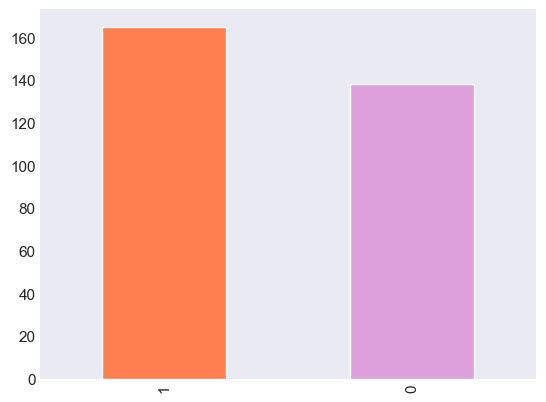

In [440]:
df["target"].value_counts().plot.bar(color=["coral", "plum"]);

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [442]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [443]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [444]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [445]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


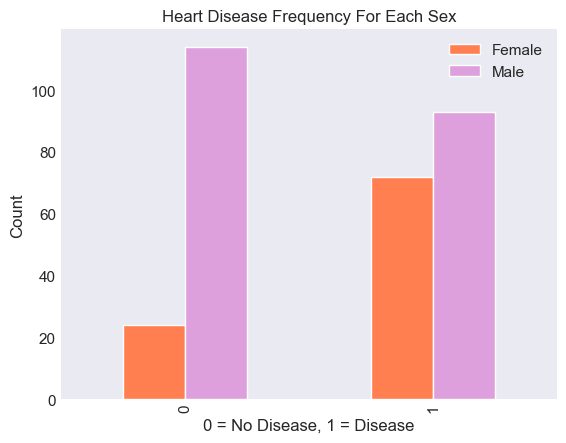

In [446]:
pd.crosstab(df.target, df.sex).plot.bar(color=["coral", "plum"])
plt.title("Heart Disease Frequency For Each Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"]);

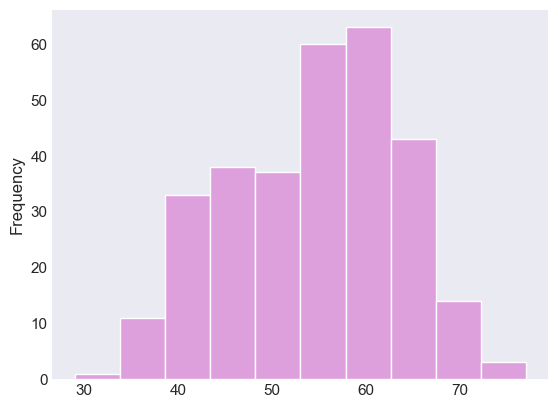

In [447]:
df.age.plot.hist(color="plum");

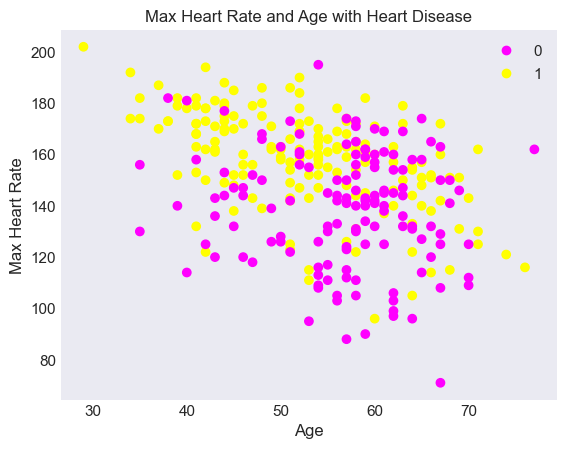

In [448]:
fig, ax = plt.subplots()
scatter = ax.scatter(df.age, df.thalach, c=df.target, cmap="spring");
ax.set(xlabel="Age", ylabel="Max Heart Rate", title="Max Heart Rate and Age with Heart Disease")
ax.legend(*scatter.legend_elements());

In [449]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


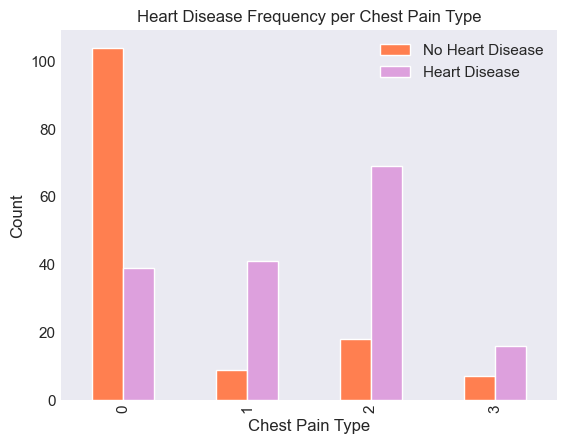

In [450]:
pd.crosstab(df.cp, df.target).plot.bar(color=["coral", "plum"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"]);

In [451]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


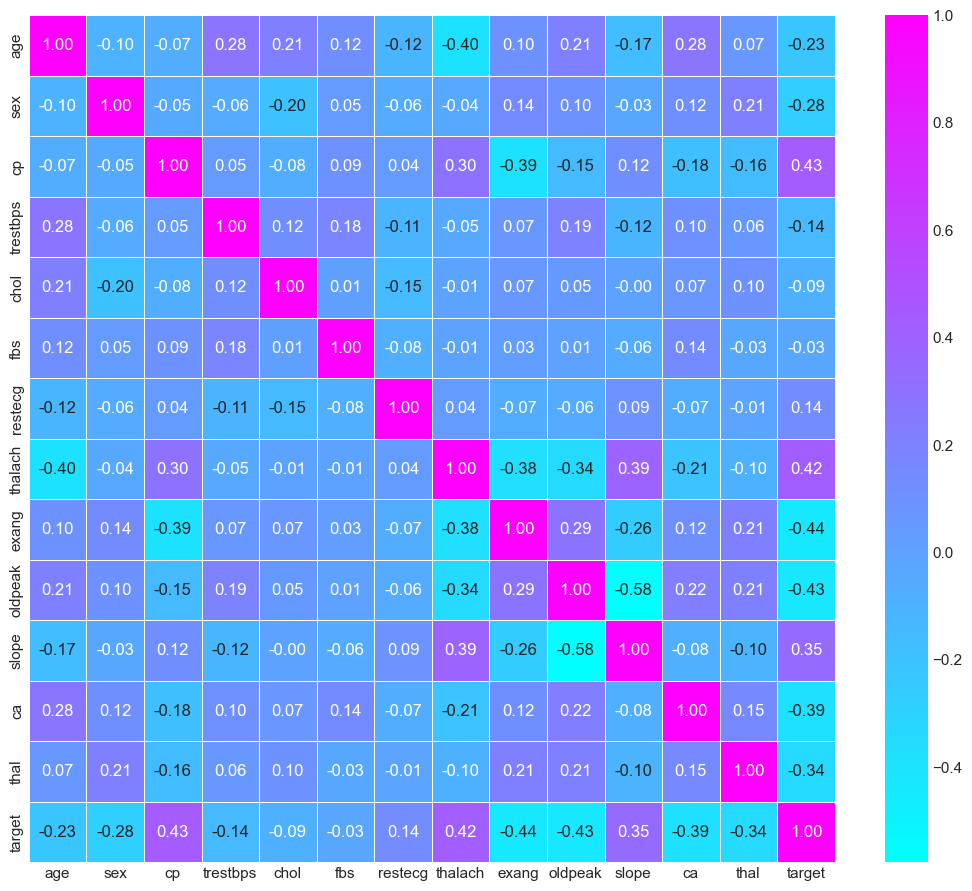

In [452]:
fig, ax = plt.subplots(figsize=(13, 11))
ax = sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="cool")

## Modelling

In [453]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [454]:
# Splitting data

X = df.drop("target", axis=1)
y = df["target"]

np.random.seed(8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [455]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

**Testing three different machine learning algorithms:**

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [456]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}


def train_and_score(models, X_train, y_train, X_test, y_test):
    """
    models - Dictionary of models
    X_train - training feature set
    y_train - training target set
    X_test - test feature set
    y_test - target test set
    """
    np.random.seed(8)
    models_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        models_scores[name] = model.score(X_test, y_test)

    return models_scores

**Baseline Model Testing & Comparison**

In [457]:
model_scores = train_and_score(models, X_train, y_train, X_test, y_test)

model_scores

/Users/yogeshprabhu/Documents/Computer Science/ztm ml/heart_disease_project/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8524590163934426}

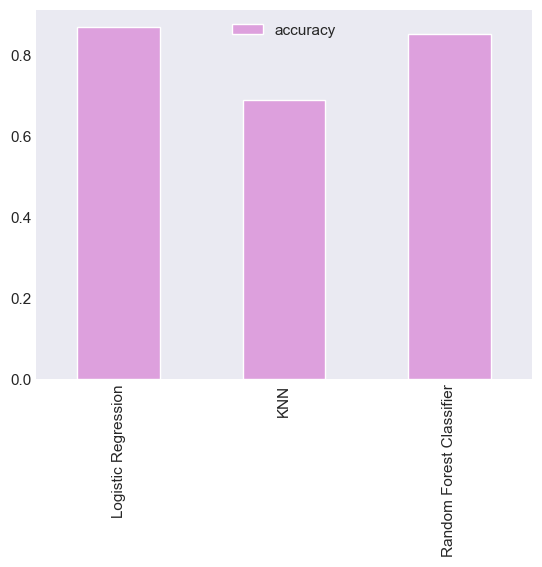

In [458]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color=["plum"]);

## Experimenting & Evaluating Models

* Hyperparameter Tuning
* ROC Curve
* Area under the curve (AUC)
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* Feature Importance

/Users/yogeshprabhu/Documents/Computer Science/ztm ml/heart_disease_project/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,KNN,Logistic Regression,Random Forest Classifier
0,0.688525,0.868852,0.852459


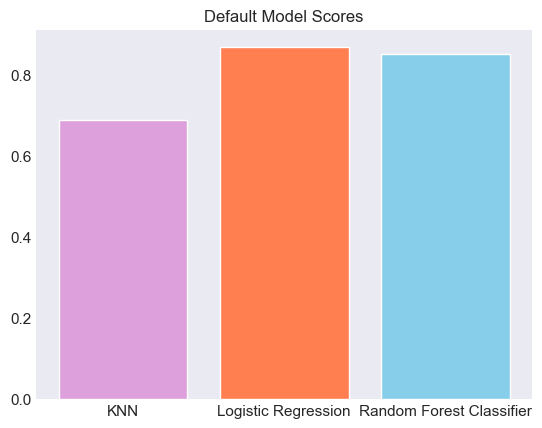

In [459]:
np.random.seed(8)
default_scores = {"KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression(),
                  "Random Forest Classifier": RandomForestClassifier()}

for idx, i in enumerate(default_scores.values()):
    i.fit(X_train, y_train)
    default_scores[list(default_scores.keys())[idx]] = i.score(X_test, y_test)

plt.bar(0, list(default_scores.values())[0], tick_label=list(default_scores.keys())[0], color="plum")
plt.bar(1, list(default_scores.values())[1], tick_label=list(default_scores.keys())[1], color="coral")
plt.bar(2, list(default_scores.values())[2], tick_label=list(default_scores.keys())[2], color="skyblue")
plt.title("Default Model Scores")
plt.xticks(range(0, 3), list(default_scores.keys()));

pd.DataFrame(default_scores, index=[0])

**Hyperparameter Tuning**

In [460]:
training_scores = []
test_scores = []

n_values = range(1, 21)
np.random.seed(8)

knn_model = KNeighborsClassifier()

for n in n_values:
    knn_model.set_params(n_neighbors=n)
    knn_model.fit(X_train, y_train)

    training_scores.append(knn_model.score(X_train, y_train))
    test_scores.append(knn_model.score(X_test, y_test))

Max Test Score: 68.85245901639344%


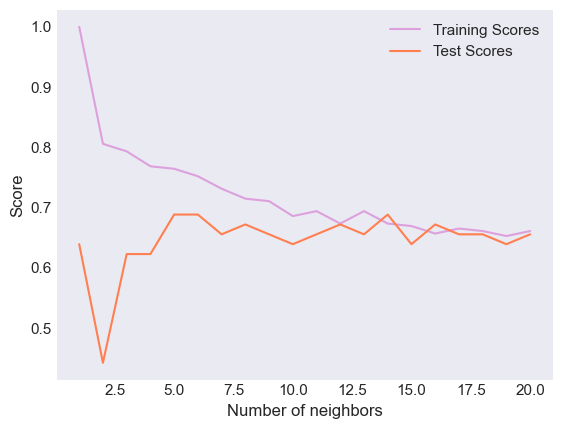

In [461]:
plt.plot(n_values, training_scores, label="Training Scores", color="plum")
plt.plot(n_values, test_scores, label="Test Scores", color="coral")
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.legend();
print(f"Max Test Score: {max(test_scores) * 100}%")

In [462]:
# KNN Hyperparameter Tuning with RandomizedSearchCV

param_dict = {"n_neighbors": [14, 15, 16], "weights": ["uniform", "distance"]}
np.random.seed(8)
knn_model = KNeighborsClassifier()
knn_tuned = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dict, n_iter=6, n_jobs=-1, cv=5,
                               verbose=1)
knn_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=6, n_jobs=-1,
                   param_distributions={'n_neighbors': [14, 15, 16],
                                        'weights': ['uniform', 'distance']},
                   verbose=1)

In [463]:
knn_tuned.best_params_

{'weights': 'uniform', 'n_neighbors': 15}

In [464]:
knn_hpt_score = knn_tuned.score(X_test, y_test)
knn_hpt_score

0.639344262295082

In [465]:
# Logistic Regression Hyperparameter Tuning with RandomizedSearchCV

param_dict = {"penalty": ["l2"], "dual": [False], "solver": ["liblinear", "newton-cholesky"],
              "C": np.logspace(-4, 4, 20), "max_iter": np.arange(100, 400, 50)}
np.random.seed(8)
lr_model = LogisticRegression()
lr_tuned = RandomizedSearchCV(estimator=lr_model, param_distributions=param_dict, n_iter=20, n_jobs=-1, cv=5, verbose=1)

lr_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'dual': [False],
                                        'max_iter': array([100, 150, 200, 250, 300, 350]),
                                        'penalty': ['l2'],
                                        'solver': ['liblinear',
                                                   'newton-cholesky']},
                   verbose=1)

In [466]:
lr_tuned.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'max_iter': 150,
 'dual': False,
 'C': 1438.44988828766}

In [467]:
lr_hpt_score = lr_tuned.score(X_test, y_test)
lr_hpt_score

0.8524590163934426

In [468]:
# Random Forest Classifier Hyperparameter Tuning with RandomizedSearchCV
param_dict = {"n_estimators": np.arange(200, 2000, 200), "max_depth": np.arange(10, 100, 10), "max_features": ["sqrt"],
              "min_samples_leaf": np.arange(1, 4, 2), "min_samples_split": [2, 5, 10]}

np.random.seed(8)
rf_clf = RandomForestClassifier()
rf_clf_tuned = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dict, n_iter=20, n_jobs=-1, cv=5,
                                  verbose=1)

rf_clf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': array([1, 3]),
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800])},
                   verbose=1)

In [469]:
rf_clf_tuned.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 90}

In [470]:
rf_hpt_score = rf_clf_tuned.score(X_test, y_test)
rf_hpt_score

0.8688524590163934

,KNN,Logistic Regression,Random Forest Classifier
0,0.639344,0.852459,0.868852


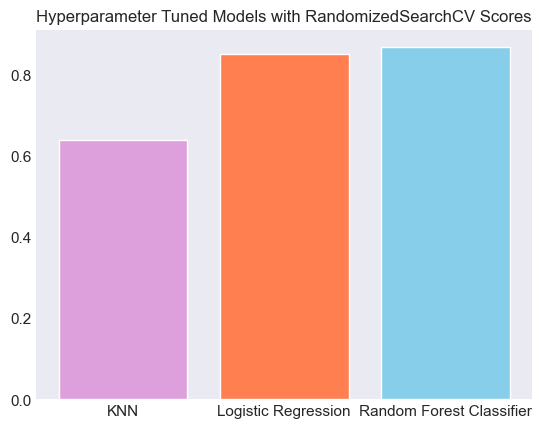

In [471]:
tuned_scores = {"KNN": knn_hpt_score, "Logistic Regression": lr_hpt_score, "Random Forest Classifier": rf_hpt_score}
plt.bar(0, list(tuned_scores.values())[0], tick_label=list(tuned_scores.keys())[0], color="plum")
plt.bar(1, list(tuned_scores.values())[1], tick_label=list(tuned_scores.keys())[1], color="coral")
plt.bar(2, list(tuned_scores.values())[2], tick_label=list(tuned_scores.keys())[2], color="skyblue")
plt.title("Hyperparameter Tuned Models with RandomizedSearchCV Scores")
plt.xticks(range(0, 3), list(tuned_scores.keys()));

pd.DataFrame(tuned_scores, index=[0])

In [472]:
# Logistic Regression Hyperparameter Tuning with GridSearchCV

param_dict = {"penalty": ["l2"], "dual": [False], "solver": ["liblinear"], "C": np.logspace(-4, 4, 20)}
np.random.seed(8)
lr_model = LogisticRegression()
lr_gs_tuned = GridSearchCV(estimator=lr_model, param_grid=param_dict, n_jobs=-1, cv=5, verbose=1)

lr_gs_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'dual': [False], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             verbose=1)

In [473]:
lr_gs_tuned.best_params_

{'C': 1.623776739188721, 'dual': False, 'penalty': 'l2', 'solver': 'liblinear'}

In [474]:
lr_hpt_score = lr_gs_tuned.score(X_test, y_test)
lr_hpt_score

0.8688524590163934

In [475]:
# Random Forest Classifier Hyperparameter Tuning with GridSearchCV
param_dict = {"n_estimators": [50, 100], "max_depth": np.arange(80, 110, 10), "max_features": ["sqrt"],
              "min_samples_leaf": [3, 4, 5, 6], "min_samples_split": [10, 15, 20]}

np.random.seed(8)
rf_clf = RandomForestClassifier()
rf_gs_tuned = GridSearchCV(estimator=rf_clf, param_grid=param_dict, n_jobs=-1, cv=5, verbose=1)

rf_gs_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 80,  90, 100]),
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [50, 100]},
             verbose=1)

In [476]:
rf_gs_tuned.best_params_

{'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 50}

In [477]:
rf_hpt_score = rf_gs_tuned.score(X_test, y_test)
rf_hpt_score

0.8360655737704918

,Logistic Regression,Random Forest Classifier
0,0.868852,0.836066


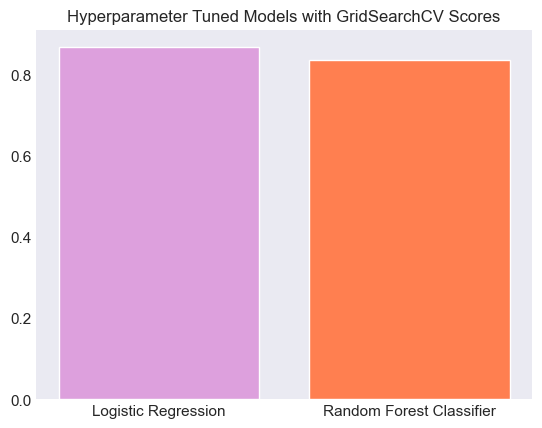

In [478]:
tuned_scores = {"Logistic Regression": lr_hpt_score, "Random Forest Classifier": rf_hpt_score}
plt.bar(0, list(tuned_scores.values())[0], tick_label=list(tuned_scores.keys())[0], color="plum")
plt.bar(1, list(tuned_scores.values())[1], tick_label=list(tuned_scores.keys())[1], color="coral")
plt.title("Hyperparameter Tuned Models with GridSearchCV Scores")
plt.xticks(range(0, 2), list(tuned_scores.keys()));

pd.DataFrame(tuned_scores, index=[0])

**ROC Curve & AUC**

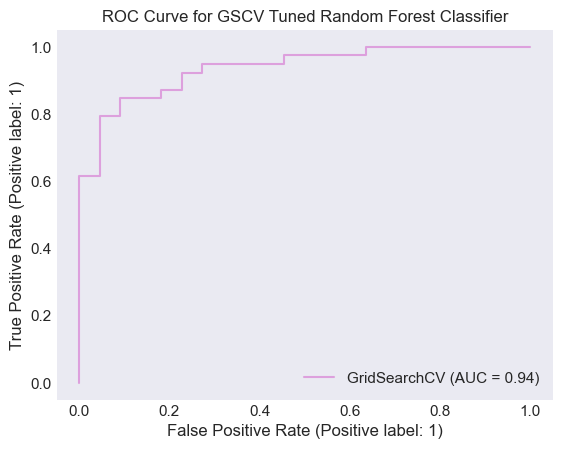

In [479]:
np.random.seed(8)
y_predict = rf_gs_tuned.predict(X_test)

RocCurveDisplay.from_estimator(rf_gs_tuned, X_test, y_test, color="plum")
plt.title("ROC Curve for GSCV Tuned Random Forest Classifier");

**Confusion Matrix**

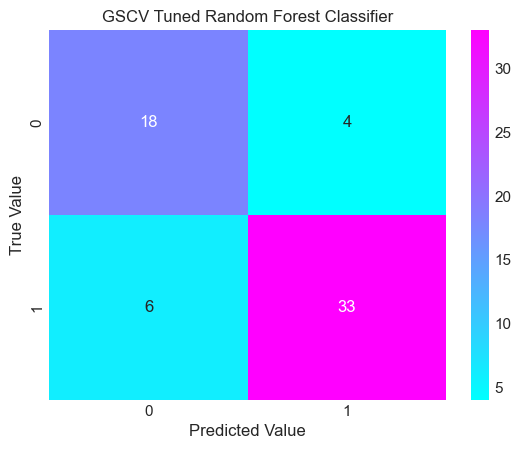

In [480]:
def plot_confusion_matrix(y_predict, y_test, model_name):
    """
    Plots Confusion Matrix Using arrays of predicted y values and true y values
    """

    fig, ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap="cool")
    plt.xlabel("Predicted Value")
    plt.ylabel("True Value")
    plt.title(model_name)


plot_confusion_matrix(y_predict, y_test, "GSCV Tuned Random Forest Classifier")

**Classification**

In [481]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.89      0.85      0.87        39

    accuracy                           0.84        61
   macro avg       0.82      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [482]:
rf_gs_tuned.best_params_

{'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 50}

In [483]:
reset_rf_model = RandomForestClassifier(max_depth=90, max_features="sqrt", min_samples_leaf=6, min_samples_split=20,
                                        n_estimators=50)

**Cross Validated Accuracy**

In [484]:
cv_accuracy = cross_val_score(reset_rf_model, X, y, cv=5, scoring="accuracy")
np.mean(cv_accuracy)
cv_accuracy = np.mean(cv_accuracy)

**Cross Validated Precision**

In [485]:
cv_precision = cross_val_score(reset_rf_model, X, y, cv=5, scoring="precision")
np.mean(cv_precision)
cv_precision = np.mean(cv_precision)

**Cross Validated Recall**

In [486]:
cv_recall = cross_val_score(reset_rf_model, X, y, cv=5, scoring="recall")
np.mean(cv_recall)
cv_recall = np.mean(cv_recall)

**Cross Validated F1-Score**

In [487]:
cv_f1 = cross_val_score(reset_rf_model, X, y, cv=5, scoring="f1")
np.mean(cv_f1)
cv_f1 = np.mean(cv_f1)

**Cross Validated Metrics**

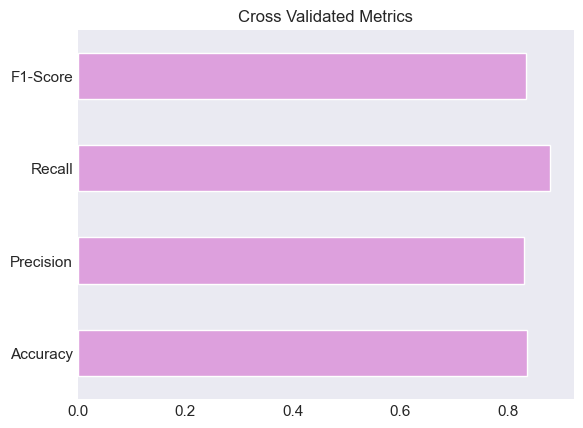

In [488]:
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy, "Precision": cv_precision, "Recall": cv_recall, "F1-Score": cv_f1},
                          index=[0])

cv_metrics.T.plot.barh(title="Cross Validated Metrics", legend=False, color="plum");

**Feature Importance**

In [489]:
np.random.seed(8)
reset_rf_model.fit(X_train, y_train)

importances = reset_rf_model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[1:]

for i in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30,
                            feat_labels[sorted_indices[i]],
                            importances[sorted_indices[i]]))
    importances[i] = importances[sorted_indices[i]]

 1) trestbps                       0.296837
 2) thal                           0.142664
 3) target                         0.111278
 4) slope                          0.100733
 5) exang                          0.081356
 6) oldpeak                        0.070873
 7) sex                            0.296837
 8) ca                             0.040390
 9) cp                             0.142664
10) fbs                            0.081356
11) chol                           0.100733
12) thalach                        0.296837
13) restecg                        0.070873


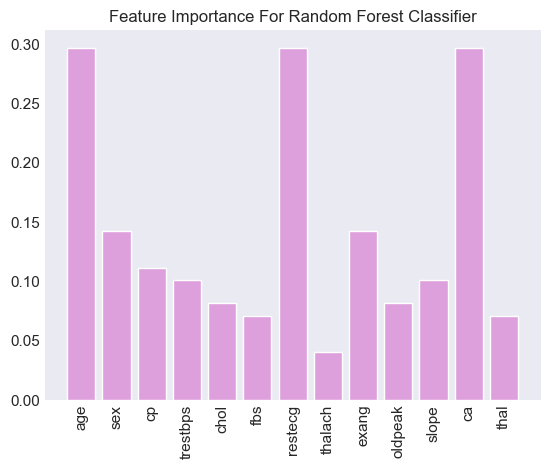

In [490]:
plt.title("Feature Importance For Random Forest Classifier")
plt.bar(range(X_train.shape[1]), importances, align="center", color="plum")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90);

## Evaluation

Unfortunately we were not able to meet the initial expectations of 95% accuracy at predicting whether a patient has heart disease during the proof of concept, we'll pursue the project, however there a multiple other factors to take into account when moving on:

* Could we add/get more data?
* Could we improve upon the models in any other way?
* Are there other models we could try? Catboost? XGBoost?